In [14]:
%%time
dataset_name = "W19_comb"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

# BES_Panel = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_only\\BES2019_W23_v23.0.dta" )

Toggle code

Wall time: 6.53 s


In [40]:
country_set = BES_Panel[ search(BES_Panel,"^countryW\d").index ].apply(lambda x:"|".join( set(x.dropna().unique()) ), axis=1)


In [41]:
country_set.value_counts(dropna=False)

England                   76761
Scotland                  11592
Wales                      6685
                           1116
England|Wales               420
England|Scotland            407
Scotland|Wales               14
Wales|Scotland                7
England|Wales|Scotland        2
England|Scotland|Wales        2
dtype: int64

In [137]:
scot_wales_spec_variables = ['likeSNPW1', 'likePCW1', 'likeSNPW2', 'likePCW2', 'likeSNPW3',
       'likePCW3', 'likeSNPW4', 'likePCW4', 'likeSNPW5', 'likePCW5',
       'likeSNPExtraW5',  'likePCW6', 'likeSNPW7', 'likePCW7',
       'likeSNPW8', 'likePCW8', 'likeSNPW9', 'likePCW9', 'likeSNPW10',
       'likePCW10',  'likePCW11',  'likePCW12',
        'likePCW13', 'likeSNPW14', 'likePCW14', 'likeSNPW15',
       'likePCW15', 'likeSNPW16', 'likePCW16',  'likePCW17',
        'likePCW18',  'likePCW19']

In [144]:
england_only = country_set=="England"
england_only[country_set==""]=np.nan
# fill in gaps using like SNP/PC
questions_for_scot_wales = BES_Panel[scot_wales_spec_variables].notnull().any(axis=1)
england_only.loc[questions_for_scot_wales] = False
england_only.loc[england_only.isnull()] = True
# england_only = england_only.astype('bool')

In [145]:
# BES_Panel[search(BES_Panel,"SNP")[search(BES_Panel,"SNP")<17000].index].notnull().any(axis=1)
# BES_Panel[search(BES_Panel,"likeSNP|likePC").index].notnull().sum()
#.notnull().any(axis=1).sum()

In [146]:
england_only.value_counts(dropna=False)

1.0      74695
False    22311
dtype: int64

In [ ]:
## we need


## set of variables (N~15)
## with no missing values -> ptv, fill in from previous waves (can't without prev waves!), then fill in by mean
## number or clusters -> lazy elbow method
## some way to visualise -> political compass?




In [4]:
search(BES_Panel,"ptv|country")

ptvCon             30949
ptvLab             30949
ptvLD              30949
ptvSNP              3035
ptvPC               1861
ptvBrexitParty     30949
ptvGrn             30949
country            29926
p_country_birth    30894
dtype: int64

In [6]:
mask = BES_Panel["country"]=="England"

In [7]:
search(BES_Panel[mask],"ptv|country")

ptvCon             25191
ptvLab             25191
ptvLD              25191
ptvSNP                 3
ptvPC                  7
ptvBrexitParty     25191
ptvGrn             25191
country            25191
p_country_birth    25147
dtype: int64

In [8]:
BES_Panel[mask]["ptvCon"].value_counts(dropna=False)

Very unlikely    9204
Very likely      4515
Don't know       2004
8                1463
5                1442
7                1377
9                 993
6                 952
2                 924
1                 915
3                 801
4                 601
Name: ptvCon, dtype: int64

In [9]:
pan_dataset_votes = pd.read_pickle( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\small data files\\pan_dataset_votes.zip", compression='zip' )

In [11]:
search(pan_dataset_votes,"complete")

2005GEVote_complete     97006
2010GEVote_complete     97006
2015GEVote_complete     97006
2017GEVote_complete     97006
2019GEVote_complete     97006
2016EUVote_complete     97006
2014EEVote_complete     97006
2019EEVote_complete     97006
2014SCOTREF_complete    97006
2014LE_complete         97006
2015LE_complete         97006
2016LE_complete         97006
2017LE_complete         97006
2018LE_complete         97006
2019LE_complete         97006
2011SEC_complete        97006
2011SEL_complete        97006
2016SEC_complete        97006
2016SEL_complete        97006
2016WEC_complete        97006
2016WEL_complete        97006
dtype: int64

In [66]:
# pan_dataset_votes.loc[england_only]

In [58]:
england_only.shape

(97006,)

In [59]:
pan_dataset_votes.shape

(97006, 63)

In [76]:
pan_dataset_votes.loc[england_only.astype('bool'),search(pan_dataset_votes,"complete").index].stack().value_counts()

UNK            313359
TYTV(Def)       29373
CNV             22382
DNV             19834
LAB             17137
CON             15377
TYTV(Maybe)     15332
Not Present     10017
LD               7231
REMAIN           5779
LEAVE            4173
UKIP             3843
GP               3009
DK               2142
OTH              1118
BXP               834
BNP               260
TIG               110
SNP                29
PC                 24
NO                  2
YES                 1
dtype: int64

In [70]:
pan_dataset_votes.loc[england_only.astype('bool'),search(pan_dataset_votes,"complete").index].stack().value_counts()

UNK            909142
CNV            147533
CON            110967
LAB             99351
DNV             87996
TYTV(Def)       59364
LD              47535
TYTV(Maybe)     29965
REMAIN          29776
LEAVE           28191
UKIP            22903
GP              17418
BXP             11710
Not Present     10017
DK               9470
OTH              9106
TIG              1067
BNP               974
SNP               140
PC                 69
NO                 25
YES                10
dtype: int64

In [105]:
scot_wales_specific = ((pan_dataset_votes=="SNP")|(pan_dataset_votes=="PC")).any(axis=1)\
                        |pan_dataset_votes["2014SCOTREF_complete"].isin(["YES","NO","DK"])\
                        |pan_dataset_votes[ search(pan_dataset_votes,"(SEL|SEC|WEC|WEL)_complete").index ].isin(["SNP","DNV","LAB","CON","LD","OTH","PC","GP","UKIP"]).any(axis=1)

In [150]:
england_only = england_only.astype('bool')

In [151]:
england_only.groupby(scot_wales_specific).value_counts()

False  True     74409
       False     5030
True   False    17281
       True       286
dtype: int64

In [153]:
england_only = (england_only & (~scot_wales_specific))

In [162]:
pan_dataset_votes[ search(pan_dataset_votes,"(GE|EU|EE)Vote_complete").index ][england_only].stack().value_counts()

UNK            191339
CON             86029
LAB             74858
DNV             56543
LD              36988
TYTV(Def)       31656
REMAIN          28551
LEAVE           26919
UKIP            15493
GP              12565
BXP             11171
DK               8044
TYTV(Maybe)      5806
Not Present      3816
OTH              3603
TIG              1024
BNP               867
dtype: int64

In [203]:
NotPresent = pan_dataset_votes[pan_dataset_votes=="Not Present"][ search(pan_dataset_votes,"(GE|EU|EE)Vote_complete").index ].any(axis=1)
DK = pan_dataset_votes[pan_dataset_votes=="DK"][ search(pan_dataset_votes,"(GE|EU|EE)Vote_complete").index ].any(axis=1)
# Unknown_2019 = pan_dataset_votes["2019GEVote_complete"]=="UNK"
# Unknown = (pan_dataset_votes[ search(pan_dataset_votes,"(GE|EU|EE)Vote_complete").index ]=="UNK").any(axis=1)

Unknown_2017_forwards = (pan_dataset_votes[ search(pan_dataset_votes,"(2015|2016|2017|2019)(GE|EU|EE)Vote_complete").index ]=="UNK").any(axis=1)

TooYoung = (pan_dataset_votes[ search(pan_dataset_votes,"(2015|2016|2017|2019)(GE|EU|EE)Vote_complete").index ].isin(["TYTV(Def)","TYTV(Maybe)"])).any(axis=1)
Other = (pan_dataset_votes[ search(pan_dataset_votes,"(2015|2016|2017|2019)(GE|EU|EE)Vote_complete").index ].isin(["OTH"])).any(axis=1)

In [163]:
pan_dataset_votes[ search(pan_dataset_votes,"(GE|EU|EE)Vote_complete").index ].isin(["DK"]).mean()

2005GEVote_complete    0.044636
2010GEVote_complete    0.024431
2015GEVote_complete    0.014731
2017GEVote_complete    0.012071
2019GEVote_complete    0.002278
2016EUVote_complete    0.000454
2014EEVote_complete    0.003154
2019EEVote_complete    0.003206
dtype: float64

In [166]:
pan_dataset_votes[ search(pan_dataset_votes,"(GE|EU)Vote_complete").index ].isin(["UNK"]).mean()

2005GEVote_complete    0.115271
2010GEVote_complete    0.127518
2015GEVote_complete    0.112735
2017GEVote_complete    0.270921
2019GEVote_complete    0.667433
2016EUVote_complete    0.170804
dtype: float64

In [ ]:
## mask - england_only AND notNotPresent AND no DKs AND not Unknown in 2019 AND

In [196]:
mask = england_only & ~NotPresent & ~DK & ~Unknown_2019 &~Unknown_2017_forwards
print(mask.sum())
(pan_dataset_votes[ search(pan_dataset_votes,"(2005|2010|2015|2016|2017|2019)(GE|EU)Vote_complete").index ][mask]=="UNK").mean()



19931


2005GEVote_complete    0.17104
2010GEVote_complete    0.17972
2015GEVote_complete    0.00000
2017GEVote_complete    0.00000
2019GEVote_complete    0.00000
2016EUVote_complete    0.00000
dtype: float64

In [204]:
mask = england_only & ~NotPresent & ~DK &~Unknown_2017_forwards & ~TooYoung & ~Other
mask.sum()

18422

In [205]:
pan_dataset_votes[ search(pan_dataset_votes,"(2015|2016|2017|2019)(GE|EU)Vote_complete").index ][mask].stack().value_counts()

CON       22875
LAB       16581
LEAVE      8957
REMAIN     8290
DNV        6751
LD         5473
UKIP       2591
GP         1707
BXP         450
BNP          13
dtype: int64

In [ ]:
# then cast BNP|UKIP|BXP -> One party

In [207]:
df = pan_dataset_votes[ search(pan_dataset_votes,"(2015|2016|2017|2019)(GE|EU)Vote_complete").index ][mask]
df = df.replace({"BNP":"REFUK","UKIP":"REFUK","BXP":"REFUK"})

In [211]:
df = pd.get_dummies(df)

In [214]:
df = df.drop(df.columns[df.var()==0],axis=1)

In [218]:
df.sum().sort_values()

2017GEVote_complete_GP         349
2019GEVote_complete_REFUK      450
2017GEVote_complete_REFUK      464
2019GEVote_complete_GP         538
2015GEVote_complete_GP         820
2016EUVote_complete_DNV       1175
2017GEVote_complete_LD        1581
2015GEVote_complete_LD        1585
2019GEVote_complete_DNV       1685
2017GEVote_complete_DNV       1830
2015GEVote_complete_DNV       2061
2015GEVote_complete_REFUK     2140
2019GEVote_complete_LD        2307
2015GEVote_complete_LAB       5111
2019GEVote_complete_LAB       5188
2017GEVote_complete_LAB       6282
2015GEVote_complete_CON       6705
2017GEVote_complete_CON       7916
2019GEVote_complete_CON       8254
2016EUVote_complete_REMAIN    8290
2016EUVote_complete_LEAVE     8957
dtype: int64

In [222]:
df

,2015GEVote_complete_REFUK,2015GEVote_complete_CON,2015GEVote_complete_GP,2015GEVote_complete_LAB,2015GEVote_complete_LD,2015GEVote_complete_DNV,2017GEVote_complete_REFUK,2017GEVote_complete_CON,2017GEVote_complete_GP,2017GEVote_complete_LAB,...,2017GEVote_complete_DNV,2019GEVote_complete_REFUK,2019GEVote_complete_CON,2019GEVote_complete_GP,2019GEVote_complete_LAB,2019GEVote_complete_LD,2019GEVote_complete_DNV,2016EUVote_complete_LEAVE,2016EUVote_complete_REMAIN,2016EUVote_complete_DNV
id,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
14,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
15,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
23,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
33,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98271,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
98279,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
98321,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [219]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
from hkmeans import HKMeans

# read the dataset
dataset = fetch_20newsgroups(subset='all', categories=None,
                             shuffle=True, random_state=256)

gold_labels = dataset.target
n_clusters = np.unique(gold_labels).shape[0]

# create count vectors using the 10K most frequent words
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(dataset.data)

# HKMeans initialization and clustering; parameters:
# perform 10 random initializations (n_init=10); the best one is returned.
# up to 15 optimization iterations in each initialization (max_iter=15)
# use all cores in the running machine for parallel execution (n_jobs=-1)
hkmeans = HKMeans(n_clusters=n_clusters, random_state=128, n_init=10,
                  n_jobs=-1, max_iter=15, verbose=True)
hkmeans.fit(X)

# report standard clustering metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(gold_labels, hkmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(gold_labels, hkmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(gold_labels, hkmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(gold_labels, hkmeans.labels_))
print("Adjusted Mutual-Info: %.3f" % metrics.adjusted_mutual_info_score(gold_labels, hkmeans.labels_))

Initialization complete
H-KMeans inertia in best partition: 16810.81
Homogeneity: 0.245
Completeness: 0.290
V-measure: 0.266
Adjusted Rand-Index: 0.099
Adjusted Mutual-Info: 0.263


In [ ]:
### CRASHES!

In [227]:
# n_clusters = 5

# # HKMeans initialization and clustering; parameters:
# # perform 10 random initializations (n_init=10); the best one is returned.
# # up to 15 optimization iterations in each initialization (max_iter=15)
# # use all cores in the running machine for parallel execution (n_jobs=-1)
# hkmeans = HKMeans(n_clusters=n_clusters, random_state=128, n_init=10,
#                   n_jobs=-1, max_iter=15, verbose=True)
# hkmeans.fit(df.values)

# # report standard clustering metrics
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(gold_labels, hkmeans.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(gold_labels, hkmeans.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(gold_labels, hkmeans.labels_))
# print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(gold_labels, hkmeans.labels_))
# print("Adjusted Mutual-Info: %.3f" % metrics.adjusted_mutual_info_score(gold_labels, hkmeans.labels_))

In [231]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [232]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [233]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.396s	69662	0.680	0.719	0.699	0.570	0.695	0.162
random   	0.036s	69707	0.675	0.716	0.694	0.560	0.691	0.179
PCA-based	0.012s	74152	0.653	0.683	0.668	0.539	0.664	0.132
__________________________________________________________________________________


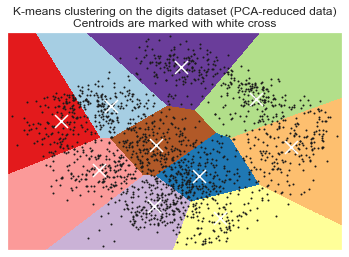

In [234]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [259]:
df = df.apply(lambda x: x/x.std())

In [260]:
import numpy as np
from sklearn.datasets import load_digits

# data, labels = load_digits(return_X_y=True)
n_clusters=5
data=df.values
labels = np.random.randint(0,n_clusters,df.shape[0])
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")


from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))
    
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")    

# digits: 5; # samples: 18422; # features 21
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.070s	216119	0.000	0.000	0.000	-0.000	-0.000	0.373
random   	0.056s	216091	0.000	0.000	0.000	-0.000	-0.000	0.377
PCA-based	0.023s	216383	0.000	0.000	0.000	-0.000	-0.000	0.367
__________________________________________________________________________________


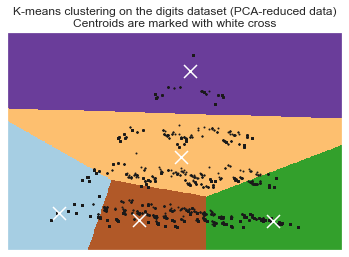

In [269]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data,sample_weight=BES_Panel.loc[df.index,"wt_new_W19_result"])

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
### Look at the latent dimensions with some decomposition

In [271]:
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def dim_red(df,n_components=None,red_type="Factor Analysis",show_first_x_comps=4,display_comp=True,LDA_target=None):

    Treatment = "Census Data Decomposition"
    output_folder = "E:\\BES_analysis_data\\output\\CensusDataDecomposition\\"
    output_subfolder = output_folder + Treatment + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )

    decomp_index = df.index
    decomp_columns = df.columns
    clean_feature_set_std = StandardScaler().fit_transform(df.values)
    decomp_std = pd.DataFrame(   clean_feature_set_std,
                                 columns = decomp_columns,
                                 index   = decomp_index      )
    if n_components is None:
        n_components = decomp_std.shape[1]
    
    # n_components = 4
    # (svd_solver='full', n_components='mle',whiten=True)
    
    if red_type == "Factor Analysis":
        decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hr
    elif red_type == "PCA":
        decomp = PCA(n_components = n_components,svd_solver='full')
    elif red_type == "LDA":
        decomp = LinearDiscriminantAnalysis(n_components = n_components,solver='svd')
        
    decomp_method = str(decomp).split("(")[0] 
    
    if red_type in ["Factor Analysis","PCA"]:
        X_r = decomp.fit_transform(decomp_std)
    elif red_type in ["LDA"]:
        X_r = decomp.fit_transform(decomp_std,LDA_target)
    
    n_components = min(n_components,X_r.shape[1])
    BES_decomp = pd.DataFrame(   X_r,
                                 columns = range(0,n_components),
                                 index   = decomp_index)

#     save = True # False => Load
#     if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
#         decomp_method = str(decomp).split("(")[0] 
#         subdir = output_subfolder + decomp_method
#         fname = subdir+ os.sep + decomp_method
    subdir = output_subfolder + decomp_method
    if display_comp:
        (BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                              decomp_columns, BES_decomp, manifest=None, 
                                                              save_folder = subdir,  
                                                              show_first_x_comps= show_first_x_comps, show_histogram = False)    
        return (BES_decomp, comp_labels, comp_dict, decomp)
    else:
        return BES_decomp

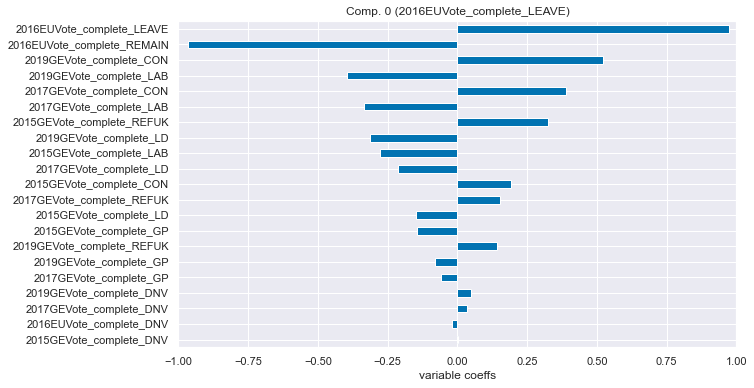

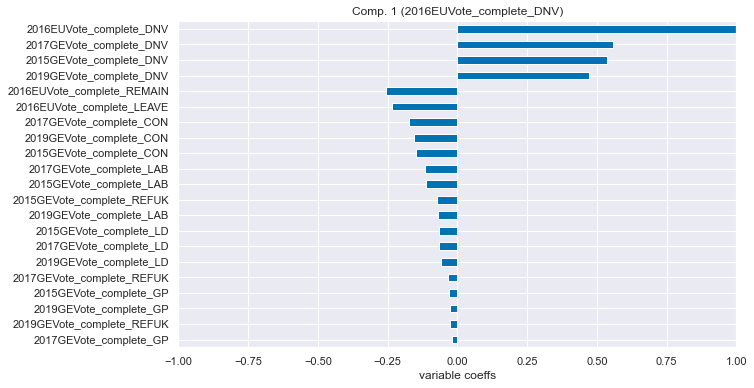

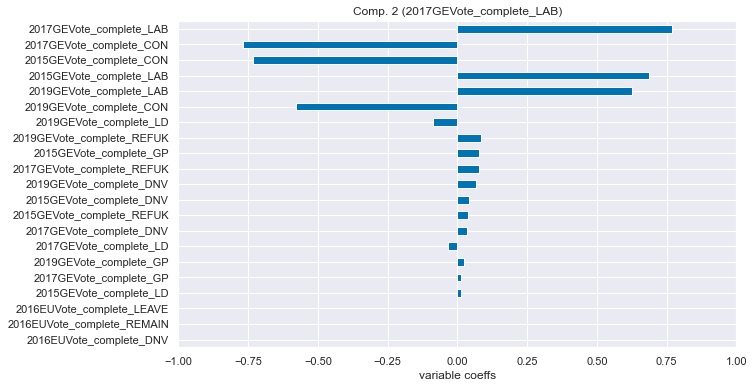

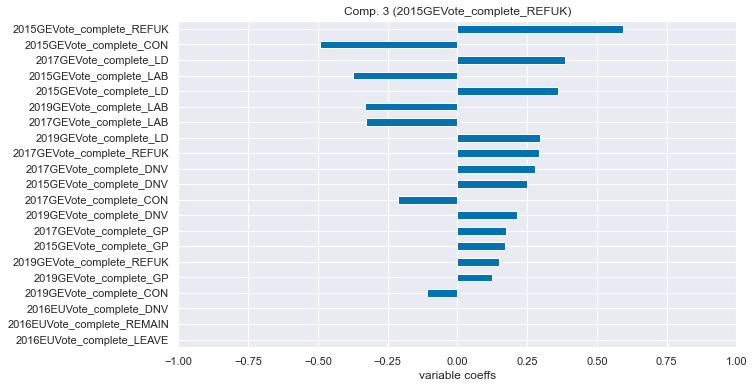

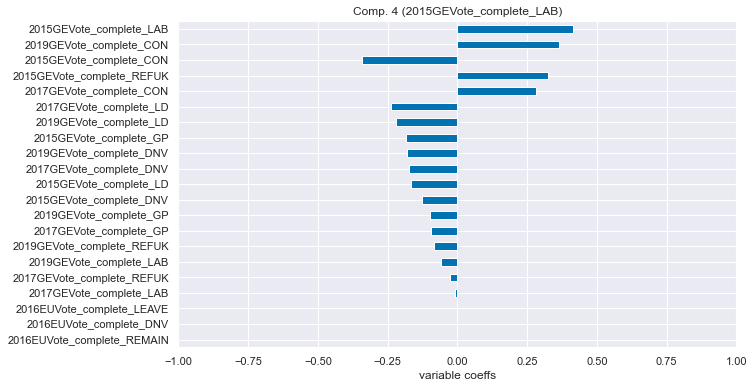

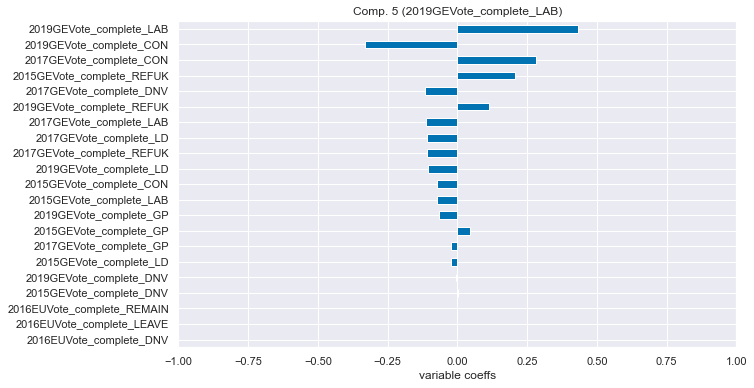

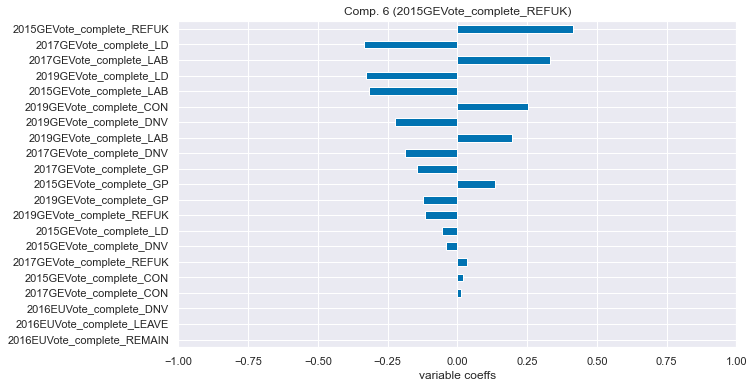

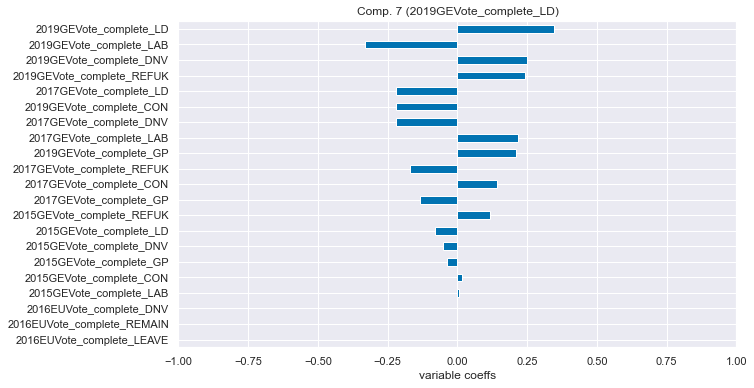

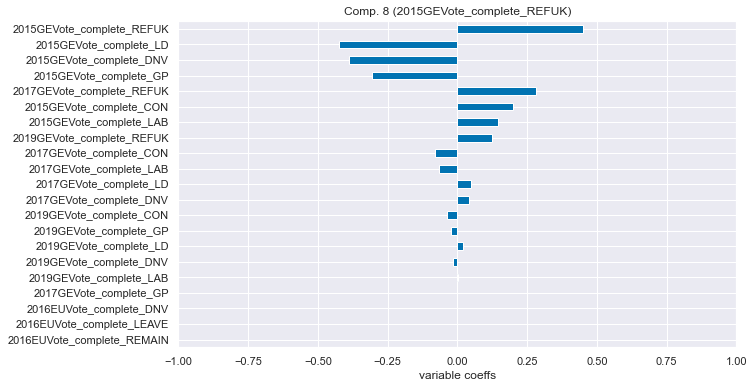

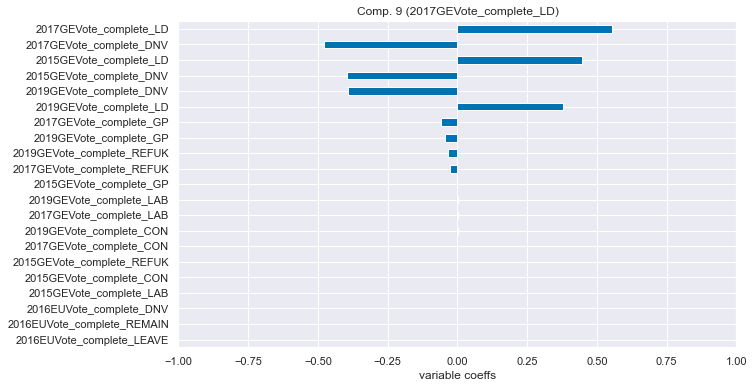

In [273]:

n_compFA = 10
n_comp = 10

(BES_decomp, comp_labels, comp_dict, decomp) = dim_red(df, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [274]:
df

,2015GEVote_complete_REFUK,2015GEVote_complete_CON,2015GEVote_complete_GP,2015GEVote_complete_LAB,2015GEVote_complete_LD,2015GEVote_complete_DNV,2017GEVote_complete_REFUK,2017GEVote_complete_CON,2017GEVote_complete_GP,2017GEVote_complete_LAB,...,2017GEVote_complete_DNV,2019GEVote_complete_REFUK,2019GEVote_complete_CON,2019GEVote_complete_GP,2019GEVote_complete_LAB,2019GEVote_complete_LD,2019GEVote_complete_DNV,2016EUVote_complete_LEAVE,2016EUVote_complete_REMAIN,2016EUVote_complete_DNV
id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,2.233401,0.0,0.00000,0.0,0.000000,0.00000,2.109438,...,0.0,6.477695,0.000000,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
14,0.000000,2.078344,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
15,0.000000,2.078344,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
23,3.120788,0.000000,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
33,0.000000,0.000000,0.000000,2.233401,0.0,0.00000,0.0,0.000000,0.00000,2.109438,...,0.0,0.000000,0.000000,0.000000,2.223205,0.000000,0.0,0.000000,2.010019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98271,0.000000,2.078344,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
98279,0.000000,0.000000,0.000000,0.000000,0.0,3.17235,0.0,0.000000,0.00000,2.109438,...,0.0,0.000000,0.000000,0.000000,2.223205,0.000000,0.0,0.000000,2.010019,0.0
98321,0.000000,0.000000,0.000000,2.233401,0.0,0.00000,0.0,0.000000,0.00000,2.109438,...,0.0,0.000000,0.000000,0.000000,0.000000,3.021246,0.0,0.000000,2.010019,0.0


In [ ]:
### Add sample weighting! DONE - one line in fit function

In [ ]:
### Look at methods of deciding optimal cluster size

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


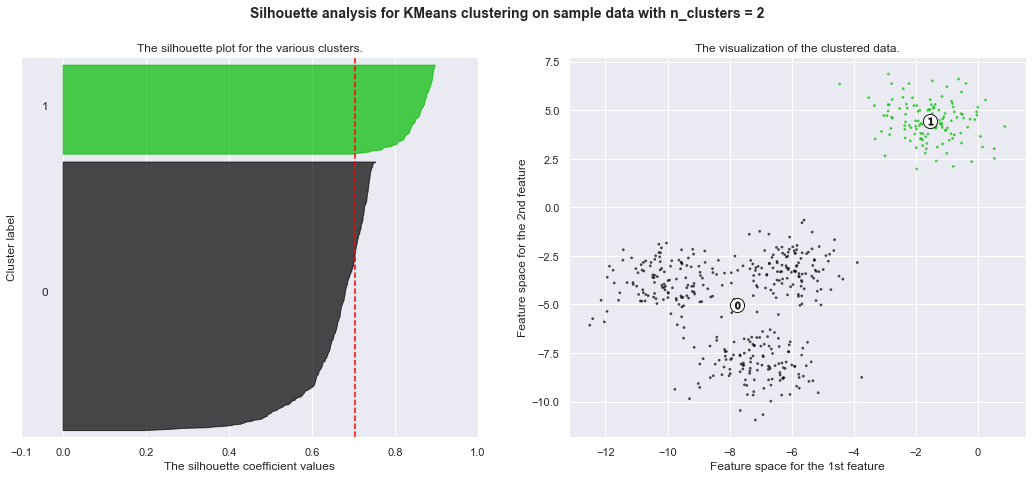

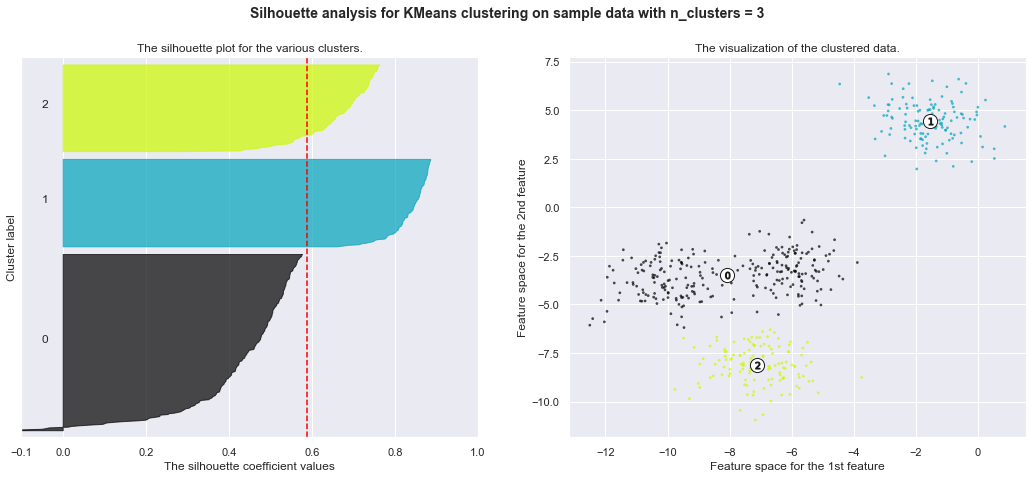

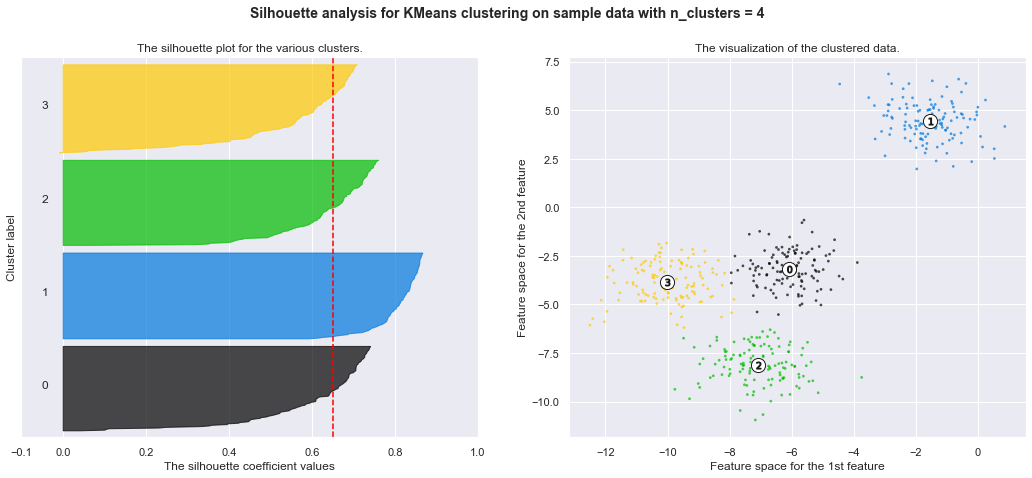

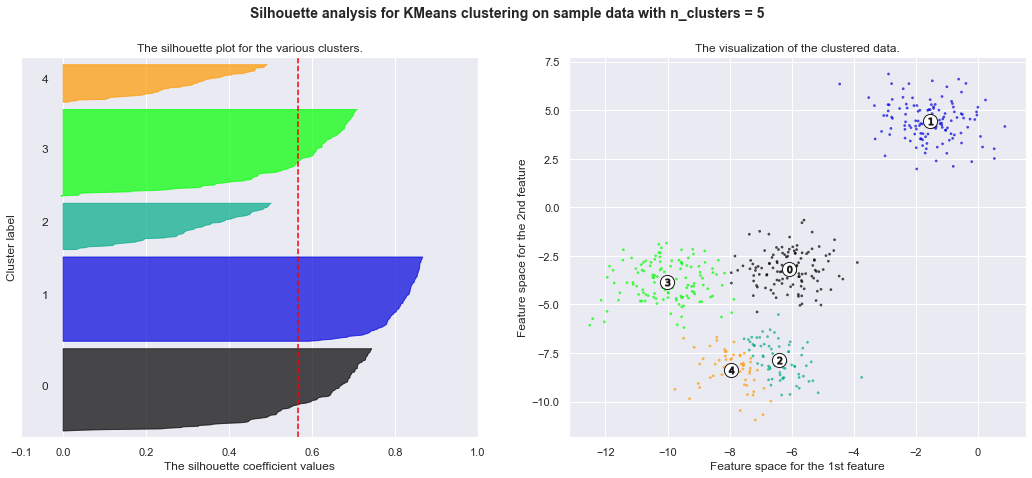

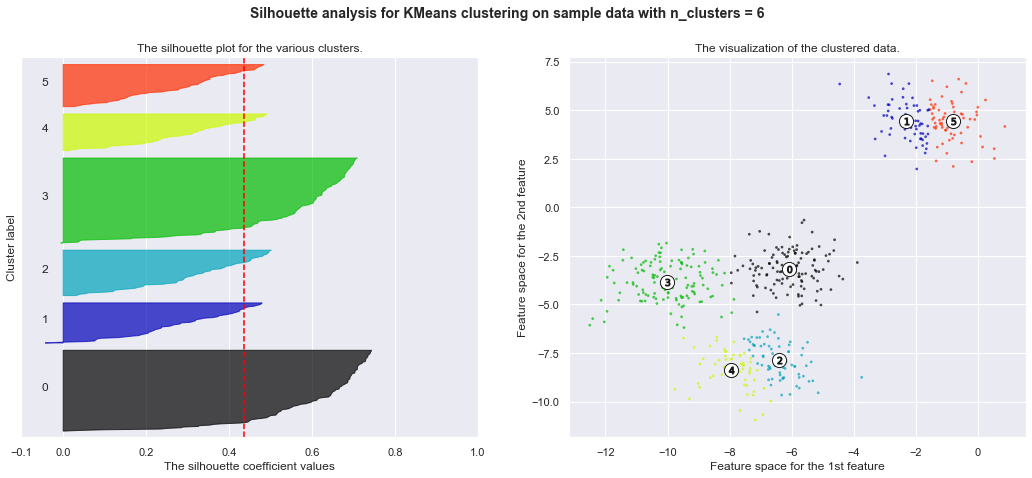

In [280]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init="k-means++", n_init=1, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.21143819463212843
For n_clusters = 3 The average silhouette_score is : 0.2973177715616747
For n_clusters = 4 The average silhouette_score is : 0.35514668951881373
For n_clusters = 5 The average silhouette_score is : 0.36768955060792025
For n_clusters = 6 The average silhouette_score is : 0.3916405555890901


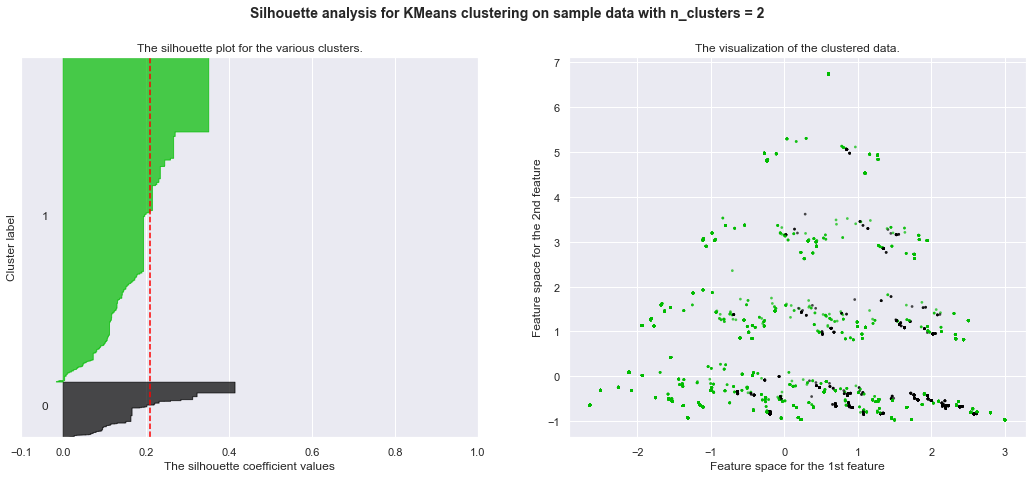

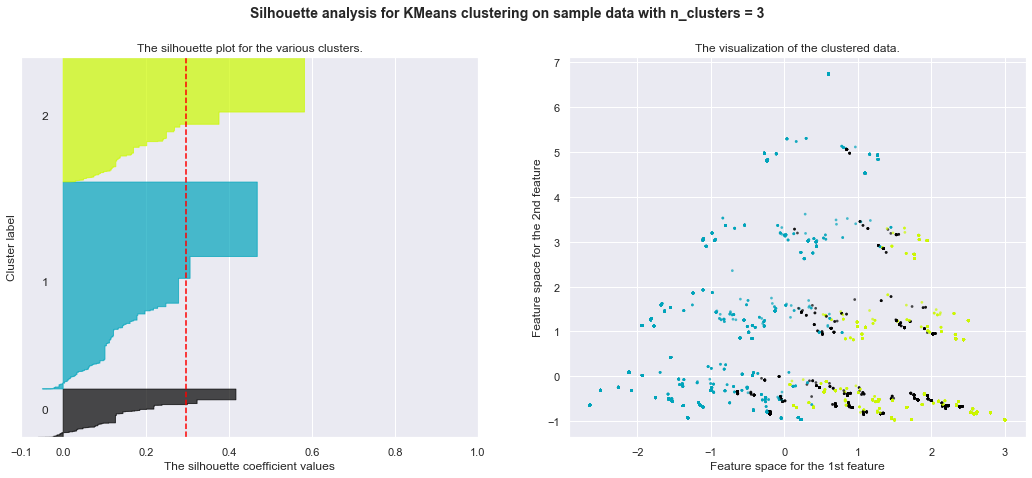

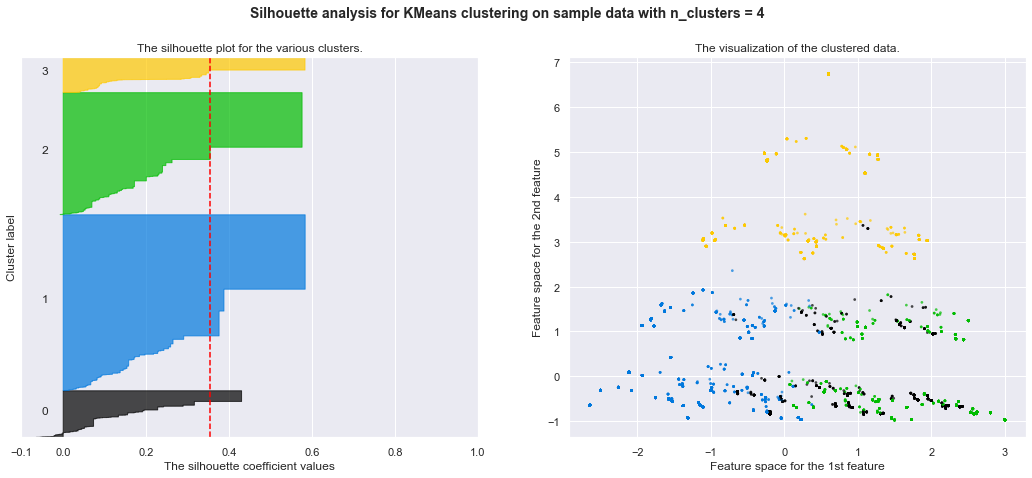

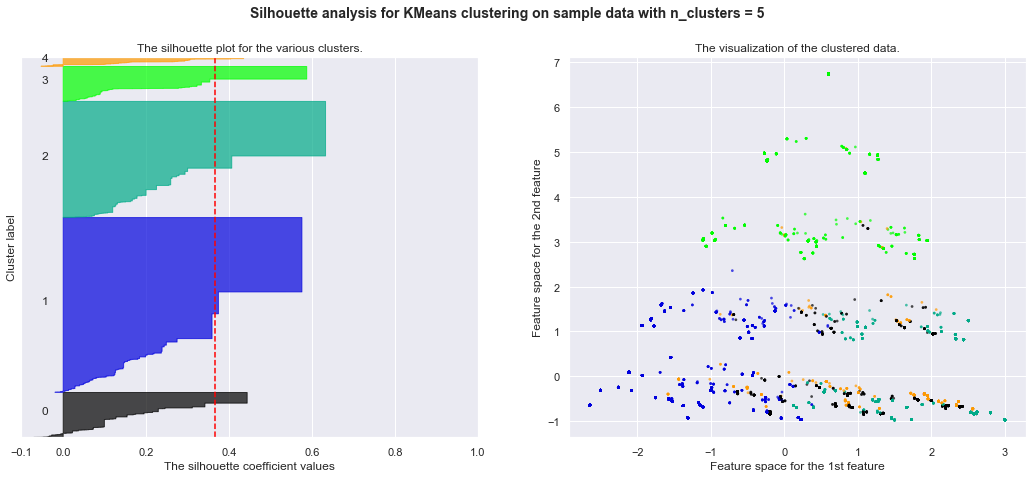

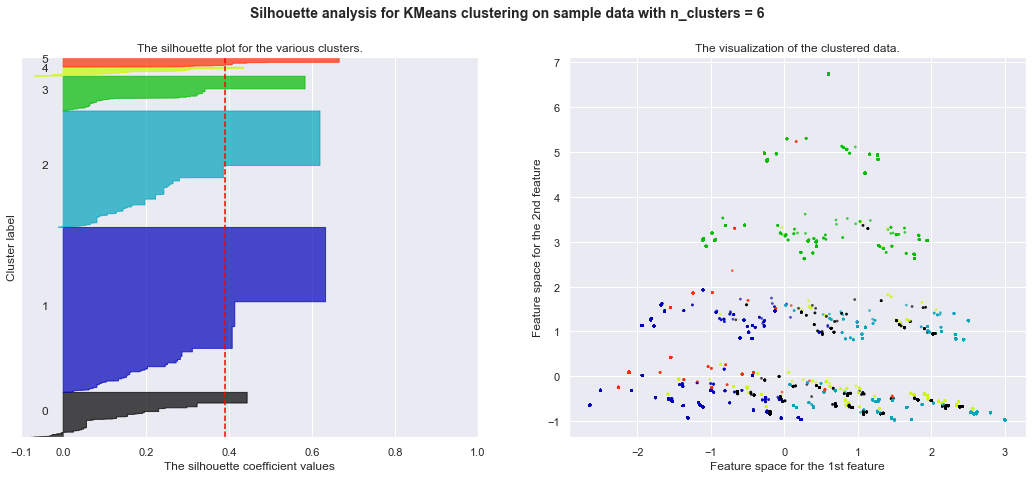

In [282]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

X=df.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init="k-means++", n_init=1, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    reduced_data = PCA(n_components=2).fit_transform(X)
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        reduced_data[:, 0], reduced_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
### Find that code that did automatic cluster description!

In [262]:
df

,2015GEVote_complete_REFUK,2015GEVote_complete_CON,2015GEVote_complete_GP,2015GEVote_complete_LAB,2015GEVote_complete_LD,2015GEVote_complete_DNV,2017GEVote_complete_REFUK,2017GEVote_complete_CON,2017GEVote_complete_GP,2017GEVote_complete_LAB,...,2017GEVote_complete_DNV,2019GEVote_complete_REFUK,2019GEVote_complete_CON,2019GEVote_complete_GP,2019GEVote_complete_LAB,2019GEVote_complete_LD,2019GEVote_complete_DNV,2016EUVote_complete_LEAVE,2016EUVote_complete_REMAIN,2016EUVote_complete_DNV
id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,2.233401,0.0,0.00000,0.0,0.000000,0.00000,2.109438,...,0.0,6.477695,0.000000,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
14,0.000000,2.078344,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
15,0.000000,2.078344,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
23,3.120788,0.000000,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
33,0.000000,0.000000,0.000000,2.233401,0.0,0.00000,0.0,0.000000,0.00000,2.109438,...,0.0,0.000000,0.000000,0.000000,2.223205,0.000000,0.0,0.000000,2.010019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98271,0.000000,2.078344,0.000000,0.000000,0.0,0.00000,0.0,2.020009,0.00000,0.000000,...,0.0,0.000000,2.010828,0.000000,0.000000,0.000000,0.0,2.000707,0.000000,0.0
98279,0.000000,0.000000,0.000000,0.000000,0.0,3.17235,0.0,0.000000,0.00000,2.109438,...,0.0,0.000000,0.000000,0.000000,2.223205,0.000000,0.0,0.000000,2.010019,0.0
98321,0.000000,0.000000,0.000000,2.233401,0.0,0.00000,0.0,0.000000,0.00000,2.109438,...,0.0,0.000000,0.000000,0.000000,0.000000,3.021246,0.0,0.000000,2.010019,0.0


id
3        0.346831
14       0.656503
15       0.609590
23       0.423346
33       0.417713
           ...   
98271    0.969683
98279    2.341179
98321    1.187719
98329    0.396615
98339    1.982658
Name: wt_new_W19_result, Length: 18422, dtype: float64

In [265]:
BES_Panel

,wave1,wave2,wave3,wave4,wave5,wave6,wave7,wave8,wave9,wave10,...,oslauaW10,oslauaW11,oslauaW12,oslauaW13,oslauaW14,oslauaW15,oslauaW17,oslauaW18,oslauaW19,oslauaW16
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Tandridge,Tandridge,Tandridge,Tandridge,Tandridge,NaN,Tandridge,Tandridge,Tandridge,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,Boston,Boston,Boston,Boston,Boston,Boston,NaN,NaN,Boston,Boston
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Preston,NaN,NaN,NaN
98448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Plymouth,NaN,NaN,NaN
98449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Adur,NaN,Adur,NaN
